In [2]:
import pandas as pd

df2308 = pd.read_csv('data/서울특별시_전동킥보드_견인_현황_20230831.csv', encoding = 'cp949')

In [3]:
df2308.head()

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15


In [4]:
df2308.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123727 entries, 0 to 123726
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      123727 non-null  int64 
 1   신고일     123727 non-null  object
 2   구정보     123727 non-null  object
 3   주소      123727 non-null  object
 4   유형      123726 non-null  object
 5   조치일     123726 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.7+ MB


유형 칼럼과 조치일 칼럼에 결측치 하나씩 존재. 확인 필요.

In [5]:
df2308[df2308['유형'].isnull()]

,번호,신고일,구정보,주소,유형,조치일
2815,2816,2021-08-17,관악구,서울특별시 관악구 신림동 1467-10,NaN,NaN


결측치 제거

In [6]:
df2308.dropna(inplace=True)

사라진 거 확인

In [7]:
df2308.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123726 entries, 0 to 123726
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      123726 non-null  int64 
 1   신고일     123726 non-null  object
 2   구정보     123726 non-null  object
 3   주소      123726 non-null  object
 4   유형      123726 non-null  object
 5   조치일     123726 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.6+ MB


### 지금까지 상황 정리
- 서울시 전동킥보드 견인 현황 : https://data.seoul.go.kr/dataList/OA-21304/S/1/datasetView.do
- 서울시 전동킥보드 주차구역 현황 : https://data.seoul.go.kr/dataList/OA-21710/S/1/datasetView.do
- 
- 전화 신고도 있고 웹페이지 신고도 있는듯 : https://seoul-pm.eseoul.go.kr/mobile/report/main.do
- 웹페이지 신고는 QR 찍어서 공유킥보드 회사, 킥보드ID 수집하는듯.
- 
- 파일은 최신 파일만 보면 됨. 이전 파일에 담긴 내용 다 포함하고 있음.
- 2021년 7월 15일부터 시작.
- 결측치는 21년 8월 17일에 딱 하나 존재 -> 제거
- 2023년 8월부터는 유형 칼럼이 정해진 값대로 작성되지 않고 민원내용을 그대로 복붙해놓고 있음. -> 데이터 범위를 21년 7월부터 23년 7월까지만 다루면 될듯.
- 유형 칼럼에서 오신고 행 존재 -> 제거해야 함.
- 
- 기본적으로 월별로 어느 지역에서 견인이 가장 많이 이뤄지는지 확인해 볼 수 있음.
- 
- 처음엔 6개 자치구에서 시작해서 25개 자치구 전체로 확대됨. -> 그 시점 파악해 볼 것.
- 2022년 3월 22일 이후 견인유예 제도 시행 -> 이 때 전후 견인량 차이도 볼 것 : https://biz.chosun.com/topics/topics_social/2022/03/22/VVT6BLMHXJDAZEOQIC3XZLUKZY/
- 공유킥보드 주차공간도 이 때 이후로 생긴 듯 -> 주차공간 생긴 지역 견인량 차이도 볼 것 : https://news.mt.co.kr/mtview.php?no=2023090315024460221
- 견인업체가 셀프신고하는 문제 : https://www.sisaweek.com/news/articleView.html?idxno=201606
- 
- 운행기록 데이터가 있어야 더 깊은 분석 가능할듯. 하지만 당장 다운받을 수 있는 운행기록 데이터는 찾지 못 함.
- 국가교통데이터 오픈마켓 : https://www.bigdata-transportation.kr/frn/prdt/detail?prdtId=PRDTNUM_000000020360
- 지오비전 퍼즐 : https://puzzle.geovision.co.kr/data/%EA%B3%B5%EC%9C%A0-%ED%82%A5%EB%B3%B4%EB%93%9C-%EC%9D%B4%EC%9A%A9-d1651650511283
- 유동인구 데이터를 구해야 하나?

### 2년 범위 설정

In [8]:
df2308[df2308['신고일'] < '2023-07-15']

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
114494,114495,2023-07-14,종로구,서울특별시 종로구 내수동 72,"횡단보도, 산책로 등",2023-07-14
114495,114496,2023-07-14,관악구,서울특별시 관악구 봉천동 1718,"횡단보도, 산책로 등",2023-07-14
114496,114497,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,보도 중앙,2023-07-14
114497,114498,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,"버스정류장, 택시 승강장",2023-07-14


In [9]:
df2y = df2308[df2308['신고일'] < '2023-07-15']

### 유형 칼럼에서 오신고 행 삭제

In [10]:
df2y['유형'].unique()

array(['보도와 차도가 구분된 도로의 차도', '보도 중앙', '버스정류장, 택시 승강장', '횡단보도, 산책로 등',
       '기타', '소방시설 5m 이내 구역', '건물, 상가 보행자 진출입', '점자블록, 엘리베이터 입구',
       '육교위, 지하보차도 안', '자전거 도로', '지하철역 진출입로 및 주변', '오신고', '턱을 낮춘 진출입로',
       '통행제한 구간', '계단, 난간'], dtype=object)

In [11]:
df2y[df2y['유형'] == '오신고']

,번호,신고일,구정보,주소,유형,조치일
686,687,2021-07-22,마포구,서울특별시 마포구 공덕동 237-9,오신고,2021-07-22
2262,2263,2021-08-10,동작구,서울특별시 동작구 노량진동 114-8,오신고,2021-08-10
2299,2300,2021-08-10,동작구,서울특별시 동작구 신대방동 370-1,오신고,2021-08-10
2531,2532,2021-08-12,동작구,서울특별시 동작구 상도동 126-118,오신고,2021-08-13
3927,3928,2021-08-26,동작구,서울특별시 동작구 신대방동 345-6,오신고,2021-08-26
...,...,...,...,...,...,...
111973,111974,2023-06-30,성동구,서울특별시 성동구 상왕십리동 759-1,오신고,2023-06-30
112144,112145,2023-07-03,중구,서울특별시 중구 서소문동 37,오신고,2023-07-18
112822,112823,2023-07-05,용산구,서울특별시 용산구 효창동 255-3,오신고,2023-07-05
113619,113620,2023-07-10,중구,서울특별시 중구 신당동 251-160,오신고,2023-07-10


In [12]:
df2y[df2y['유형'] != '오신고']

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
114494,114495,2023-07-14,종로구,서울특별시 종로구 내수동 72,"횡단보도, 산책로 등",2023-07-14
114495,114496,2023-07-14,관악구,서울특별시 관악구 봉천동 1718,"횡단보도, 산책로 등",2023-07-14
114496,114497,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,보도 중앙,2023-07-14
114497,114498,2023-07-14,관악구,서울특별시 관악구 봉천동 1703-2,"버스정류장, 택시 승강장",2023-07-14


In [13]:
valid_df2y = df2y[df2y['유형'] != '오신고']

In [14]:
valid_df2y.reset_index(drop=True, inplace=True)

In [15]:
valid_df2y.head()

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15


### 시각화

구별 신고 건수 카운트해주는 dataframe 생성

In [16]:
count_df = valid_df2y.pivot_table(index=valid_df2y['신고일'], columns=valid_df2y['구정보'], aggfunc='count')['번호']

In [17]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,NaN,25.0,NaN,58.0,1.0,NaN,NaN,1.0,NaN
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,20.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,25.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN


구별 건수 합계 칼럼 생성

In [18]:
count_df['total_count'] = count_df.sum(axis = 1)

칼럼 생성 확인

In [19]:
count_df.head()

구정보,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,total_count
신고일,,,,,,,,,,,,,,,,,,,,,
2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,35.0
2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,153.0
2021-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,...,NaN,25.0,NaN,58.0,1.0,NaN,NaN,1.0,NaN,158.0
2021-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,20.0,NaN,56.0,NaN,NaN,NaN,NaN,NaN,119.0
2021-07-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,25.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,128.0


c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SBA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


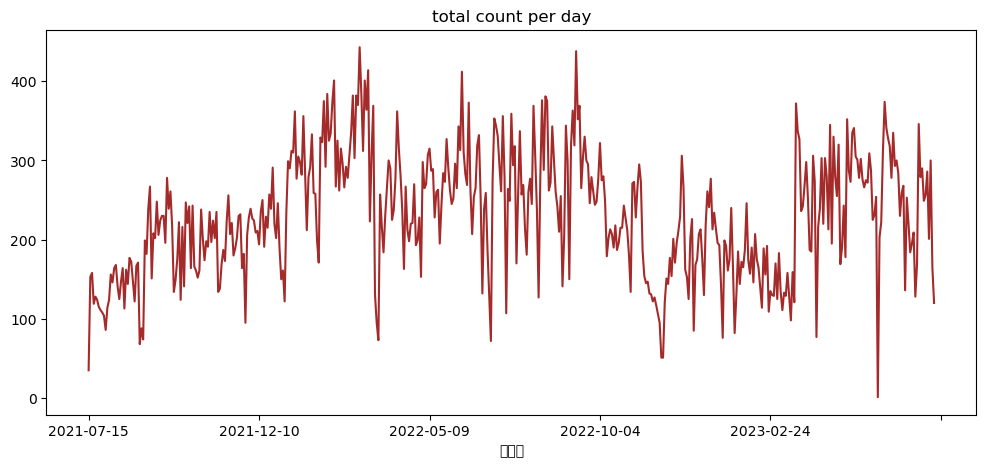

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
count_df['total_count'].plot.line(color='brown')
plt.title('total count per day')
plt.show();

In [21]:
import plotly.express as px

fig = px.line(count_df, y='total_count', title='서울 전 지역(25개 구) 일 견인 건수 합계')
fig.show();